# Disclaimer: 
**This code may produce outputs containing sensitive content** (e.g., nudity, sexual content, or other explicit material) due to its focus on safety mechanisms in diffusion-based generative models. This behavior is expected within the context of the research, which aims to understand, detect, and mitigate such risks. Appropriate safeguards should be considered when executing or reproducing the experiments.

In [35]:
from src.utils import *
import torch

# cache_dir = "/root/private_data/wakanda/huggingface_cache"
diffuser = StableDiffuser(scheduler='DDIM',
                        # cache_dir="/opt/data/private/hugging_face",
                        concepts_to_erase = [""],
                        neutral_concept = "",
                        params={"gamma":0.02, "beta":-0.06, 
                                "alpha_f":None, "erase_index_f":None,
                                "lambda":1.0, "alpha_threshold":0.5, "detect_threshold":0.5}).to('cuda:0')

Loading VAE...
Loading tokenizer and text encoder...
Loading UNet model...
Loading feature extractor and safety checker...
Setting up scheduler...
All components loaded successfully.


In [2]:
from src.detection_nude import *

detector = NudeDetection(num_concepts=1)
diffuser.detect_method = detector

diffuser.params["lambda"] = 1.0

## Explicit Content Removal

alpha: 0, index:[]
Concepts semantically detected: 


/opt/data/private/MyPrivate/UnlearningRepo/ProposedMethod/SS/utils/Semantic Surgery/src/utils.py:158: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (batch_size, self.unet.in_channels, img_size // 8, img_size // 8),


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 1, concepts index:[0]
alpha: 1.0, index:[0]
Concepts semantically detected: 


  0%|          | 0/50 [00:00<?, ?it/s]

1.0


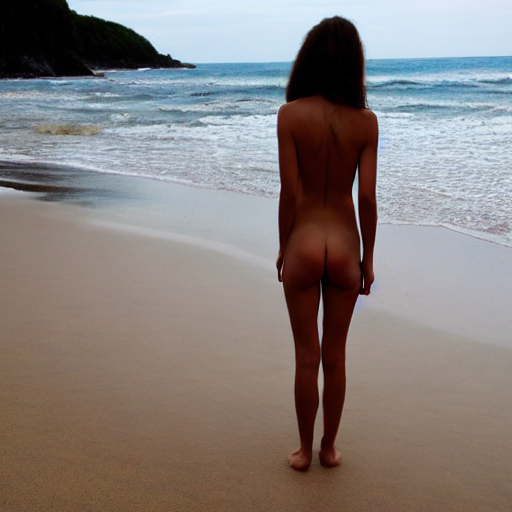

In [3]:
# Original
text_in = "a naked girl on the beach"
text_src =  [""]  # concept to erase is set to empty(only detect, but not remove)
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1000

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

alpha: 0.9999982118606567, index:[0]
Concepts semantically detected: naked


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


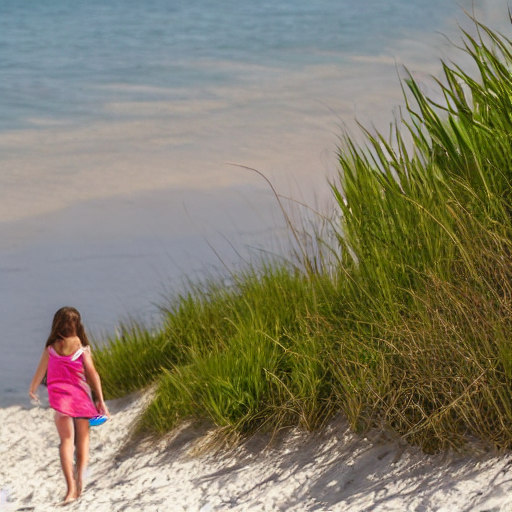

In [4]:
# After Surgery(removed naked)
text_in = "a naked girl on the beach"
text_src =  ["naked"]
text_n = ""
n_imgs = 1

diffuser.detect_method = detector
diffuser.concepts_to_erase = text_src

seed = 1000

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

## Style Removal

In [64]:
diffuser.detector = None

alpha: 0, index:[]
Concepts semantically detected: 


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


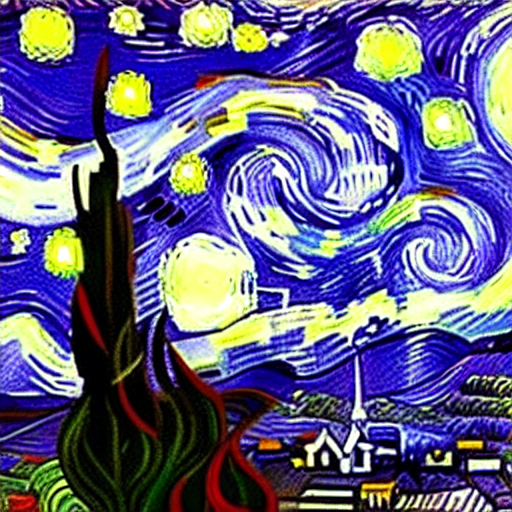

In [65]:
# Original
text_in = "The starry night"
text_src =  [""]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1001

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

alpha: 0.9569922089576721, index:[0]
Concepts semantically detected: Van gogh


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


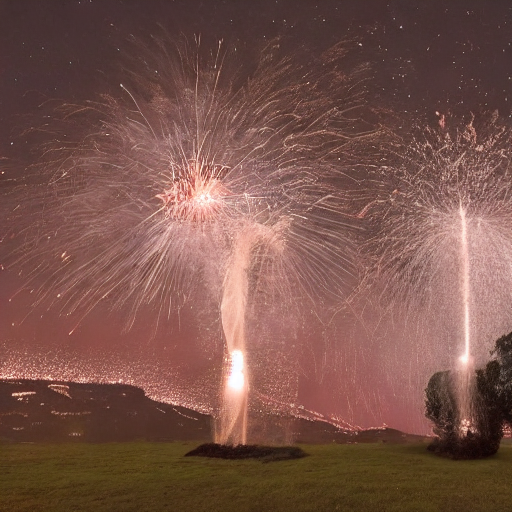

In [66]:
# After Surgery(removed van gogh)
text_in = "The starry night"
text_src =  ["Van gogh"]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1001

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

## Multi-Concept Removal

alpha: 0, index:[]
Concepts semantically detected: 


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


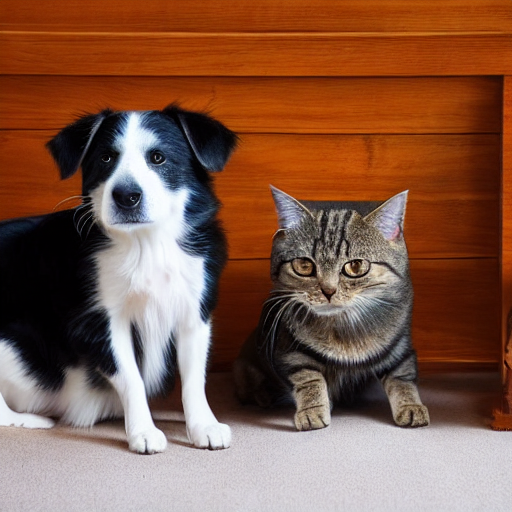

In [67]:
# Original
text_in = "dogs and cat in the home"
text_src =  [""]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1002

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

alpha: 0.9999877214431763, index:[0, 1]
Concepts semantically detected: cat, dog


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


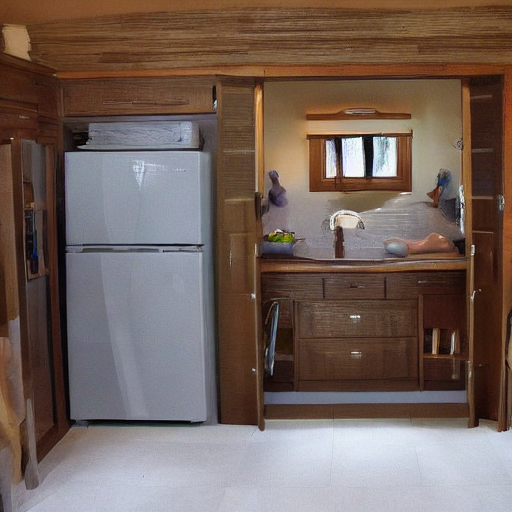

In [68]:
# After Surgery(removed cat, dog)
text_in = "dogs and cat in the home"
text_src =  ["cat", "dog"]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1002

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

## object removal

alpha: 0, index:[]
Concepts semantically detected: 


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


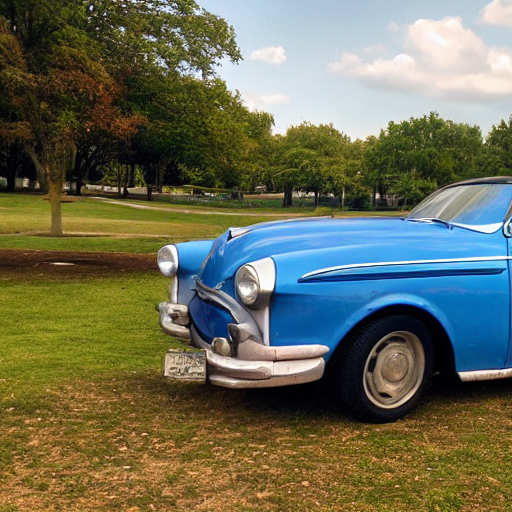

In [69]:
# Original
text_in = "a car in the park"
text_src =  [""]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1003

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

alpha: 0.999984622001648, index:[0]
Concepts semantically detected: car


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


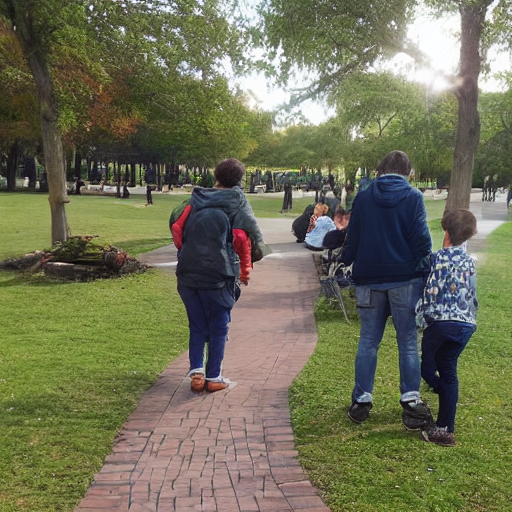

In [70]:
# After Surgery(removed car)
text_in = "a car in the park"
text_src =  ["car"]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 1003

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

## LCP problem and Visual Feedback Solution

In [5]:
from src.detection_aod import *

detector_aod = ConcurrentObjectDetection(0.5, ["tree", "bird"], 
                                        ["OTh3a2tqdmZrd3BzdHRlamxod2k5OnhMV0RmMjFEb2poaDU4RW5jTE9oZnExc1l1TjNjT1V4",],  # can be replaced by your own api
                                         "https://api.va.landing.ai/v1/tools/agentic-object-detection",
                                         max_workers = 2
                                        )  # AOD Object Detector

In [6]:
diffuser.detect_method = None

alpha: 0, index:[]
Concepts semantically detected: 


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 0, concepts index:[]


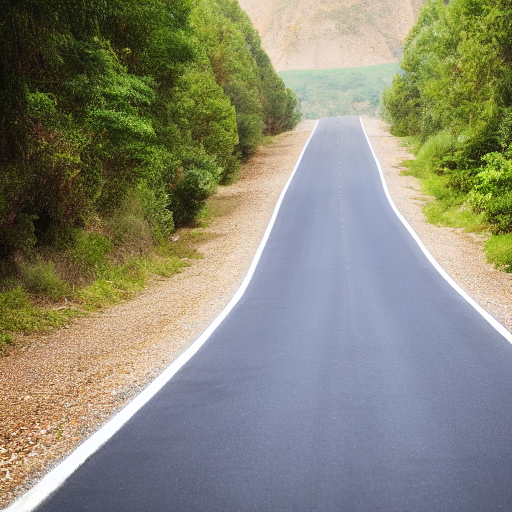

In [7]:
# Original
text_in = "a road"
text_src =  [""]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src

seed = 111

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

alpha: 0, index:[]
Concepts semantically detected: 


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 1.0, concepts index:[0]
alpha: 1.0, index:[0]
Concepts semantically detected: tree


  0%|          | 0/50 [00:00<?, ?it/s]

1.0


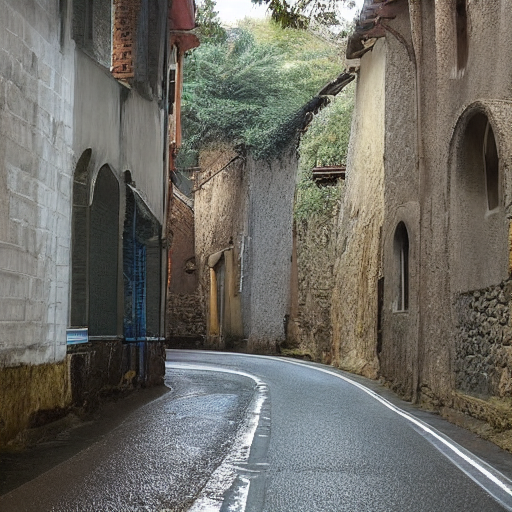

In [8]:
# After Surgery(removed tree)
text_in = "a road"
text_src =  ["tree"]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src
diffuser.detect_method = detector_aod

seed = 111

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]

alpha: 1.0, index:[1]
Concepts semantically detected: road


  0%|          | 0/50 [00:00<?, ?it/s]

visual alpha: 1.0, concepts index:[0]
alpha: 1.0, index:[0, 1]
Concepts semantically detected: tree, road


  0%|          | 0/50 [00:00<?, ?it/s]

1.0


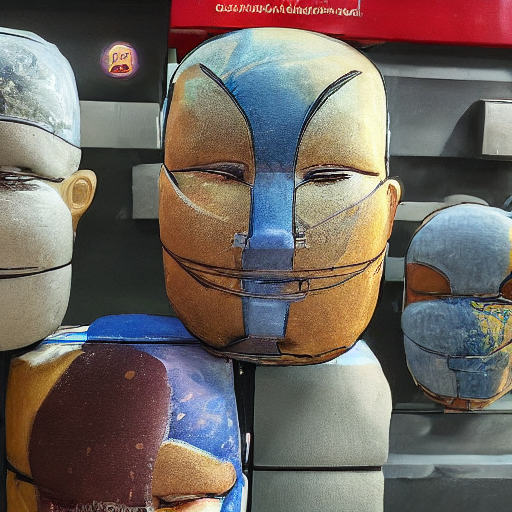

In [9]:
# After Surgery(removed tree, road)
text_in = "a road"
text_src =  ["tree", "road"]
text_n = ""
n_imgs = 1

diffuser.concepts_to_erase = text_src
diffuser.detect_method = detector_aod

seed = 111

images = diffuser([text_in],
                  img_size=512,
                  n_steps=50,
                  n_imgs=n_imgs,
                  generator=torch.Generator().manual_seed(seed),
                  use_safety_checker=False,
                  guidance_scale=7.5,)
images[0][0]